In [42]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## Load raw data

In [43]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


## Simple exploratory analysis
### Print summary statistics
Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [44]:
# print summary statistics
numeric_columns = raw.select_dtypes(include=[np.number])
print("\nSummary statistics\n", numeric_columns.describe())
print("\nCorrelation matrix\n", numeric_columns.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


### Plot histogram

Note that distributions for GDP Growth is quite skewed.

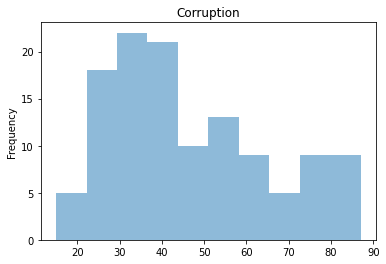

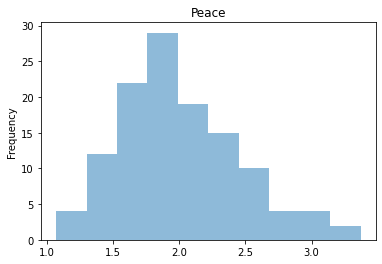

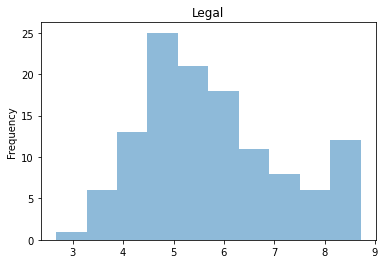

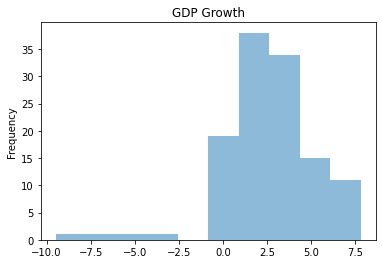

In [45]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

## K means cluster
### Pick features & normalization

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [46]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

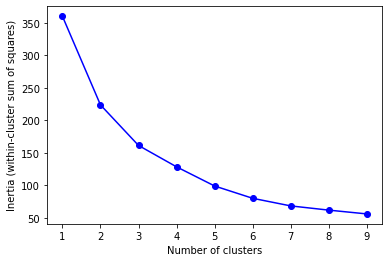

In [47]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### K means with k=3

In [48]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.1333871005255
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualize the result (3D plot)

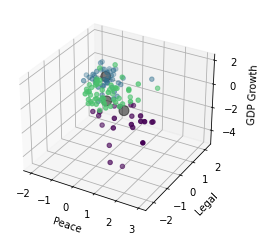

In [49]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### Visualize the result (3 2D plots)

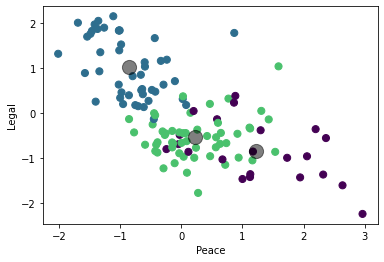

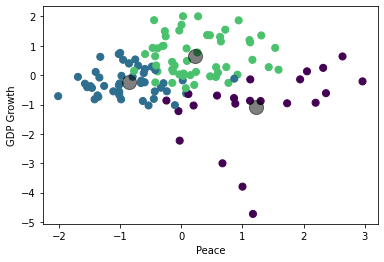

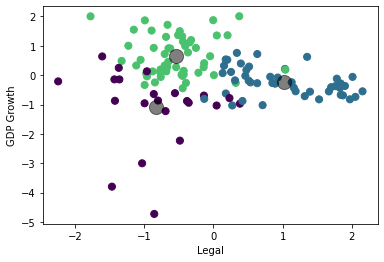

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### Visualize the result (3 2D plots)
plot country abbreviations instead of dots.

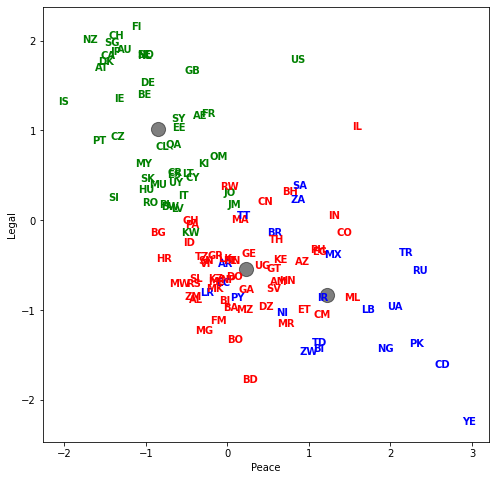

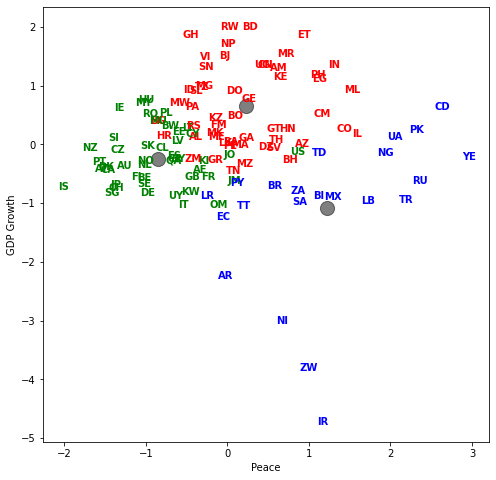

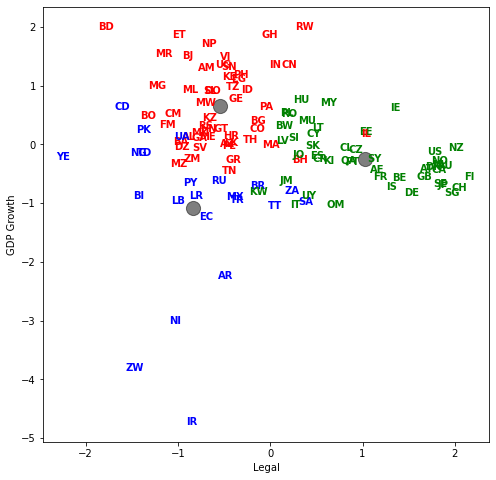

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [52]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
14                         Brazil     BR

In [53]:
# Silhouette Analysis
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.350913952385216
For n_clusters= 3 The average silhouette_score is : 0.35585223343505057
For n_clusters= 4 The average silhouette_score is : 0.3372449209416129


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

For n_clusters= 5 The average silhouette_score is : 0.34438420977393375
For n_clusters= 6 The average silhouette_score is : 0.34875382122984605
For n_clusters= 7 The average silhouette_score is : 0.3603542108728006
For n_clusters= 8 The average silhouette_score is : 0.33949173689604367
For n_clusters= 9 The average silhouette_score is : 0.3152647236003266
For n_clusters= 10 The average silhouette_score is : 0.3090796538425006


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

### Part b - Varying the Value of n_init

In [54]:
n_init_values = [2, 20, 50, 100]
results = {}

for n_init in n_init_values:
    kmeans = KMeans(n_clusters=3, n_init=n_init, random_state=1)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    labels = kmeans.labels_
    results[n_init] = (inertia, labels)


for n_init, (inertia, labels) in results.items():
    print(f"n_init={n_init}: Inertia={inertia}")


# TODO: Write out a full analysis for this and change the code analysis (also have to identify whether the countries in the high risk category change)

n_init=2: Inertia=169.2424290863102
n_init=20: Inertia=161.1333871005255
n_init=50: Inertia=161.1333871005255
n_init=100: Inertia=161.1333871005255


#### n_init = 2

In [55]:
k = 3

# Changing random state to lower determinism of centroid cluster values 
kmeans1 = KMeans(n_clusters=k, n_init=2, random_state=42)
kmeans1.fit(X)

print("inertia for k=3 is ", kmeans1.inertia_)
print("cluster centers: ", kmeans1.cluster_centers_)

y1 = kmeans1.labels_
print("cluster labels: ", y1)

inertia for k=3 is  161.25537734196618
cluster centers:  [[ 0.15270973 -0.60009398  0.70424093]
 [ 1.21777164 -0.67632275 -0.90441375]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [0 0 1 0 2 2 1 1 0 2 0 0 0 2 1 0 1 0 2 1 2 0 1 2 0 2 2 1 2 0 1 0 0 2 0 2 2
 0 0 2 0 0 0 0 2 2 0 0 1 2 1 2 2 2 2 0 0 2 2 2 1 1 2 0 0 2 0 0 2 1 0 0 0 0
 0 2 2 1 1 2 2 1 0 1 0 0 2 2 2 2 1 0 1 0 0 0 2 2 2 1 2 0 2 2 2 0 0 0 1 0 1
 0 1 2 2 2 2 0 1 0 1]


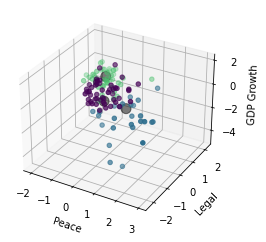

In [56]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y1)), marker='o')

centers = kmeans1.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

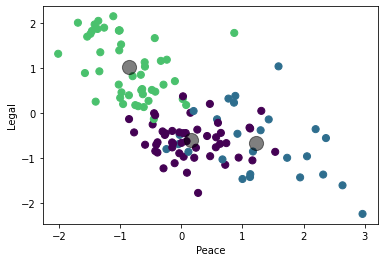

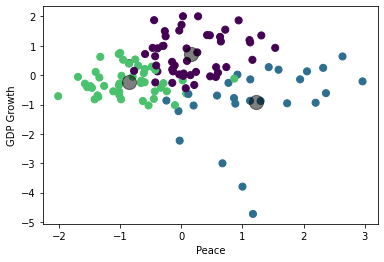

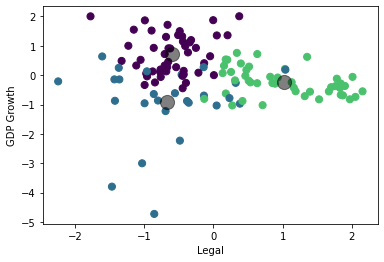

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y1)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

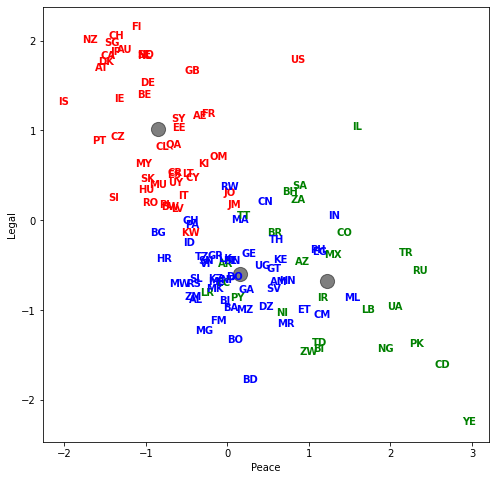

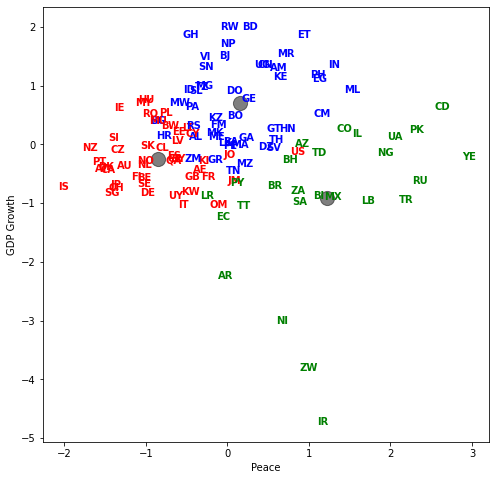

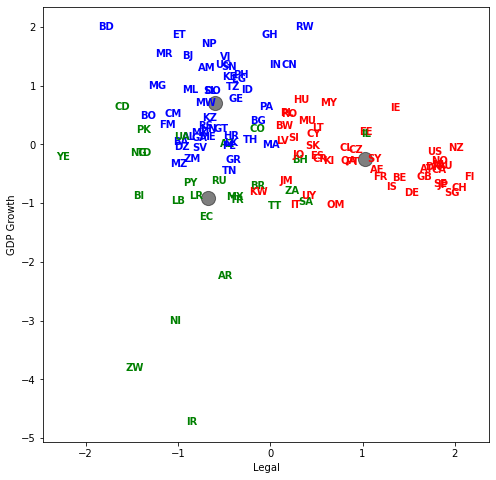

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y1[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [59]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y1})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
63                     Madagascar     MG      0
31                          Egypt     EG      0
32                    El Salvador     SV      0
84                           Peru     PE      0
34                       Ethiopia     ET      0
82                         Panama     PA      0
37                          Gabon     GA      0
38                        Georgia     GE      0
40                          Ghana     GH      0
41                         Greece     GR      0
42                      Guatemala     GT      0
29             Dominican Republic     DO      0
43                       Honduras     HN      0
47                      Indonesia     ID      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM

### n_init = 20

In [60]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=19, n_init=20)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y20 = kmeans.labels_
print("cluster labels: ", y20)

inertia for k=3 is 161.25537734196618
cluster centers:  [[-0.85097477  1.02149992 -0.23897931]
 [ 1.21777164 -0.67632275 -0.90441375]
 [ 0.15270973 -0.60009398  0.70424093]]
cluster labels:  [2 2 1 2 0 0 1 1 2 0 2 2 2 0 1 2 1 2 0 1 0 2 1 0 2 0 0 1 0 2 1 2 2 0 2 0 0
 2 2 0 2 2 2 2 0 0 2 2 1 0 1 0 0 0 0 2 2 0 0 0 1 1 0 2 2 0 2 2 0 1 2 2 2 2
 2 0 0 1 1 0 0 1 2 1 2 2 0 0 0 0 1 2 1 2 2 2 0 0 0 1 0 2 0 0 0 2 2 2 1 2 1
 2 1 0 0 0 0 2 1 2 1]


In [61]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y20})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
89                        Romania     RO      0
58                         Kuwait     KW      0
88                          Qatar     QA      0
87                       Portugal     PT      0
86                         Poland     PL      0
33                        Estonia     EE      0
35                        Finland     FI      0
36                         France     FR      0
80                           Oman     OM      0
39                        Germany     DE      0
79                         Norway     NO      0
76                    New Zealand     NZ      0
44                        Hungary     HU      0
45                        Iceland     IS      0
75                    Netherlands     NL      0
68                      Mauritius     MU      0
49                        Ireland     IE      0
65                       Malaysia     MY      0
51                          Italy     IT      0
52                        Jamaica     JM

### n_init = 50

In [62]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=12, n_init=50)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y50 = kmeans.labels_
print("cluster labels: ", y50)

inertia for k=3 is 161.1333871005255
cluster centers:  [[-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]
 [ 1.22506036 -0.83385901 -1.07842464]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 2 0 1 0 0 0 0 1 1 0 0 0 2 2 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 2 1 1 0 0 0 0 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


In [63]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y50})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
51                          Italy     IT      0
36                         France     FR      0
39                        Germany     DE      0
44                        Hungary     HU      0
45                        Iceland     IS      0
49                        Ireland     IE      0
52                        Jamaica     JM      0
53                          Japan     JP      0
54                         Jordan     JO      0
57                  Korea (South)     KI      0
58                         Kuwait     KW      0
59                         Latvia     LV      0
62                      Lithuania     LT      0
65                       Malaysia     MY      0
35                        Finland     FI      0
68                      Mauritius     MU      0
76                    New Zealand     NZ      0
79                         Norway     NO      0
80                           Oman     OM      0
86                         Poland     PL

### n_init = 100

In [64]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=67, n_init=100)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y100 = kmeans.labels_
print("cluster labels: ", y100)

inertia for k=3 is 161.25537734196618
cluster centers:  [[ 0.15270973 -0.60009398  0.70424093]
 [-0.85097477  1.02149992 -0.23897931]
 [ 1.21777164 -0.67632275 -0.90441375]]
cluster labels:  [0 0 2 0 1 1 2 2 0 1 0 0 0 1 2 0 2 0 1 2 1 0 2 1 0 1 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 2 1 1 1 1 0 0 1 1 1 2 2 1 0 0 1 0 0 1 2 0 0 0 0
 0 1 1 2 2 1 1 2 0 2 0 0 1 1 1 1 2 0 2 0 0 0 1 1 1 2 1 0 1 1 1 0 0 0 2 0 2
 0 2 1 1 1 1 0 2 0 2]


In [65]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y100})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
32                    El Salvador     SV      0
34                       Ethiopia     ET      0
105                      Tanzania     TZ      0
37                          Gabon     GA      0
38                        Georgia     GE      0
40                          Ghana     GH      0
41                         Greece     GR      0
42                      Guatemala     GT      0
43                       Honduras     HN      0
74                          Nepal     NP      0
46                          India     IN      0
64                         Malawi     MW      0
47                      Indonesia     ID      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
106                      Thailand     TH      0
55                     Kazakhstan     KZ

### Part C - Comparing high-risk countries based on feature variation

In [66]:
features = raw[['Corruption', 'Peace', 'Legal', 'GDP Growth']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
kmeans.fit(features_scaled)

# Getting the cluster labels for each country
labels = kmeans.labels_

# Adding the cluster labels to your DataFrame
raw['Cluster'] = labels


high_risk_countries = raw[raw['Cluster'] == 0]

# Printing out the high-risk countries
print("High-risk countries:\n", high_risk_countries[['Country', 'Cluster']])

High-risk countries:
                           Country  Cluster
2                       Argentina        0
14                         Brazil        0
16                        Burundi        0
19                           Chad        0
27   Democratic Republic of Congo        0
30                        Ecuador        0
48                           Iran        0
60                        Lebanon        0
61                        Liberia        0
69                         Mexico        0
77                      Nicaragua        0
78                        Nigeria        0
81                       Pakistan        0
83                       Paraguay        0
90                         Russia        0
92                   Saudi Arabia        0
99                   South Africa        0
108           Trinidad and Tobago        0
110                        Turkey        0
112                       Ukraine        0
118                         Yemen        0
120                      Zimbabw

## Part D

In [75]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
c_ward = agglomerative_clusters.labels_

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_ward})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))
    
ward_silhouette = silhouette_score(X, c_ward)
print("The average siilhouette score is :", ward_silhouette)


                          Country Abbrev  Label
0                         Albania     AL      0
70                        Moldova     FM      0
68                      Mauritius     MU      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
119                        Zambia     ZM      0
71                     Montenegro     ME      0
59                         Latvia     LV      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
108           Trinidad and Tobago     TT      0
52                        Jamaica     JM      0
51                          Italy     IT      0
50                         Israel     IL      0
115                 United States     US      0
47                      Indonesia     ID      0
58                         Kuwait     KW

In [76]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
c_complete = agglomerative_clusters.labels_

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_complete})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))
    
    
complete_silhouette = silhouette_score(X, c_complete)
print("The average siilhouette score is :", complete_silhouette)


                          Country Abbrev  Label
0                         Albania     AL      0
57                  Korea (South)     KI      0
92                   Saudi Arabia     SA      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
53                          Japan     JP      0
52                        Jamaica     JM      0
51                          Italy     IT      0
58                         Kuwait     KW      0
50                         Israel     IL      0
94                         Serbia     RS      0
47                      Indonesia     ID      0
95                   Sierra Leone     SL      0
45                        Iceland     IS      0
44                        Hungary     HU      0
96                      Singapore     SG      0
97                       Slovakia     SK      0
49                        Ireland     IE      0
59                         Latvia     LV      0
119                        Zambia     ZM

In [77]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
c_average = agglomerative_clusters.labels_

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_average})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))
    
average_silhouette = silhouette_score(X, c_average)
print("The average siilhouette score is :", average_silhouette)


                          Country Abbrev  Label
0                         Albania     AL      0
76                    New Zealand     NZ      0
75                    Netherlands     NL      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
111                        Uganda     UG      0
68                      Mauritius     MU      0
67                     Mauritania     MR      0
109                       Tunisia     TN      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
62                      Lithuania     LT      0
61                        Liberia     LR      0
119                        Zambia     ZM      0
59                         Latvia     LV      0
58                         Kuwait     KW

In [78]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X)
c_single = agglomerative_clusters.labels_

result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_single})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))
    
single_silhouette = silhouette_score(X, c_single)
print("The average siilhouette score is : ", single_silhouette)

                          Country Abbrev  Label
120                      Zimbabwe     ZW      0
48                           Iran     IR      0
77                      Nicaragua     NI      0
115                 United States     US      1
50                         Israel     IL      1
86                         Poland     PL      2
85                    Philippines     PH      2
84                           Peru     PE      2
83                       Paraguay     PY      2
82                         Panama     PA      2
81                       Pakistan     PK      2
80                           Oman     OM      2
79                         Norway     NO      2
78                        Nigeria     NG      2
76                    New Zealand     NZ      2
75                    Netherlands     NL      2
73                     Mozambique     MZ      2
87                       Portugal     PT      2
72                        Morocco     MA      2
71                     Montenegro     ME

In [79]:
silhouette_2k = silhouette_score(X, y1)
silhouette_20k = silhouette_score(X, y20)
silhouette_50k = silhouette_score(X, y50)
silhouette_100k = silhouette_score(X, y100)

kmeans_score = [silhouette_2k, silhouette_20k, silhouette_50k, silhouette_100k]
agglomerative_score = [ward_silhouette, average_silhouette, complete_silhouette, single_silhouette]

for item in kmeans_score:
    print(item)



# TODO: Use this to compare performance between agglomerative and k-means clustering

In [71]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)

results = pd.DataFrame({'Country': raw['Country'], 'Abbrev': raw['Abbrev'], 'Label':agg_clustering.labels_})

print(results)

       Country Abbrev  Label
0      Albania     AL      0
1      Algeria     DZ      0
2    Argentina     AR      0
3      Armenia     AM      0
4    Australia     AU      1
..         ...    ...    ...
116    Uruguay     UY      0
117    Vietnam     VI      0
118      Yemen     YE      2
119     Zambia     ZM      0
120   Zimbabwe     ZW      2

[121 rows x 3 columns]
